In [118]:
import pandas as pd
import numpy as np

In [119]:
df2=pd.read_csv("play.csv")

In [120]:
df2

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes
5,Rainy,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No


In [121]:
df2['Outlook']=df2['Outlook'].map({'Sunny':1,'Overcast':2,'Rainy':3})

In [122]:
df2['Temperature']=df2['Temperature'].map({'Hot':1,'Mild':2,'Cool':3})

In [123]:
df2['Humidity']=df2['Humidity'].map({'High':1,'Normal':2})

In [124]:
df2['Wind']=df2['Wind'].map({'Weak':1,'Strong':2})

In [125]:
df2['PlayTennis']=df2['PlayTennis'].map({'Yes':0,'No':1})

In [126]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Outlook      8 non-null      int64
 1   Temperature  8 non-null      int64
 2   Humidity     8 non-null      int64
 3   Wind         8 non-null      int64
 4   PlayTennis   8 non-null      int64
dtypes: int64(5)
memory usage: 452.0 bytes


In [127]:
df2.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,1,1,1,1,1
1,1,1,1,2,1
2,2,1,1,1,0
3,3,2,1,1,0
4,3,3,2,1,0


In [128]:
!pip install sklearn.preprocessing

In [129]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [130]:
from sklearn.preprocessing import LabelEncoder
le_outlook=LabelEncoder()
le_temperature=LabelEncoder()
le_humidity=LabelEncoder()
le_wind=LabelEncoder()
le_play=LabelEncoder()

# Apply encoding
df2['Outlook_num'] = le_outlook.fit_transform(df2['Outlook'])
df2['Temperature_num'] = le_temperature.fit_transform(df2['Temperature'])
df2['Humidity_num'] = le_humidity.fit_transform(df2['Humidity'])
df2['Wind_num'] = le_wind.fit_transform(df2['Wind'])
df2['PlayTennis_num'] = le_play.fit_transform(df2['PlayTennis'])

df2

,Outlook,Temperature,Humidity,Wind,PlayTennis,Outlook_num,Temperature_num,Humidity_num,Wind_num,PlayTennis_num
0,1,1,1,1,1,0,0,0,0,1
1,1,1,1,2,1,0,0,0,1,1
2,2,1,1,1,0,1,0,0,0,0
3,3,2,1,1,0,2,1,0,0,0
4,3,3,2,1,0,2,2,1,0,0
5,3,3,2,2,1,2,2,1,1,1
6,2,3,2,2,0,1,2,1,1,0
7,1,2,1,1,1,0,1,0,0,1


In [131]:
# Define features and label
X = df2[['Outlook_num', 'Temperature_num', 'Humidity_num', 'Wind_num']]
y = df2['PlayTennis_num']

print(X)
print(y)


   Outlook_num  Temperature_num  Humidity_num  Wind_num
0            0                0             0         0
1            0                0             0         1
2            1                0             0         0
3            2                1             0         0
4            2                2             1         0
5            2                2             1         1
6            1                2             1         1
7            0                1             0         0
0    1
1    1
2    0
3    0
4    0
5    1
6    0
7    1
Name: PlayTennis_num, dtype: int64


In [132]:
# Create and train the Decision Tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import  tree


model = tree.DecisionTreeClassifier()

model = model.fit(X, y)

In [139]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [140]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [147]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [148]:
pip list | grep scikit-learn


Note: you may need to restart the kernel to use updated packages.


'grep' is not recognized as an internal or external command,
operable program or batch file.


TypeError: can only concatenate str (not "numpy.int64") to str

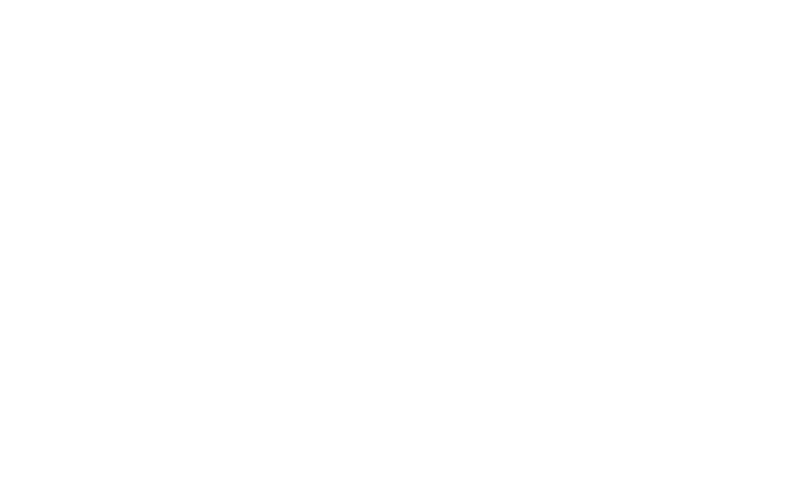

In [149]:
# Plot the decision tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
tree.plot_tree(model, feature_names=['Outlook', 'Temperature', 'Humidity', 'Wind'], class_names=le_play.classes_, filled=True)
plt.show()

In [146]:
test=[[le_outlook.transform(['Rainy'])[0],
      le_temperature.transform(['Mild'])[0],
      le_humidity.transform(['High'])[0],
      le_wind.transform(['Strong'])[0]]]
pred=model.predict(test)
print("Play Tennis?->",le_play.inverse_transform(pred)[0])

ValueError: invalid literal for int() with base 10: np.str_('Rainy')

In [ ]:
# Save the trained model to a file
import joblib

# Save the model as 'decision_tree_model.pkl'
joblib.dump(model, 'decision_tree_model.pkl')
print("Model saved as 'decision_tree_model.pkl'")

Model saved as 'decision_tree_model.pkl'


In [ ]:
pip install streamlit

  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached cachetools-5.5.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.4.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached MarkupSafe-3.0.2-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached referencing-0.36.2-py3-none-any.whl.metadata (2.8 kB)
  Using cached rpds_py-0.24.0-cp311-cp311-win_amd64.whl.metadata (4.2 kB)
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 5.6 MB/s eta 0:00